## 1. Biblioteki

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import os
import talos as ta
from talos.model.early_stopper import early_stopper

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
%load_ext tensorboard


from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns

from sklearn.model_selection import train_test_split


Using TensorFlow backend.



## 2. Dane

In [15]:
train_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_train.csv')
test_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_test.csv')
val_df=pd.read_csv('D:/STUDIA/ROK_II/Projekt/Dane_jalowka_i_krowa_val.csv')

train_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
test_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']
val_df.columns = ['id','Województwo', 'Data urodzenia', 'IE', 'Dokł. IE', 'PF', 'PI-PROD', 'PI-POKR', 'Prc', 'Psm', 'Pnr', 'Pw','PI-PLOD', 'CRj', 'CRk', 'PP', 'OMC', 'WH-KSOM', 'WH-DLUG', 'IP', 'kg ml', 'kg tł', '% tł', 'kg bi', '% bi', 'rc', 'sm', 'nr', 'w', 'og','kategoria']

caly_df = pd.concat([train_df, test_df, val_df])
caly_df['Województwo']=caly_df['Województwo'].astype('category')
caly_df['Data urodzenia']=caly_df['Data urodzenia'].astype('category')

del caly_df["id"]
del caly_df["PF"]
del caly_df["Dokł. IE"]
del caly_df['kategoria']

caly_df.shape

(1881, 27)

In [17]:
caly_df.head()

,Województwo,Data urodzenia,IE,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
0,WIELKOPOLSKIE,2020,2120,137,127,121,113,106,128,109,...,1370,577,2,452,1,115.0,114.0,109.0,127.0,123.0
1,KUJAWSKO-POMORSKIE,2018,1912,126,123,109,113,103,128,114,...,1209,358,-16,354,-4,115.0,113.0,104.0,123.0,123.0
2,POMORSKIE,2020,2126,126,120,110,107,102,124,113,...,982,368,-4,350,4,104.0,103.0,102.0,122.0,117.0
3,KUJAWSKO-POMORSKIE,2020,2089,133,111,104,110,99,114,114,...,1080,546,12,410,7,106.0,106.0,101.0,112.0,112.0
4,ZACHODNIOPOMORSKIE,2020,2853,125,115,91,95,101,124,134,...,516,501,36,289,15,102.0,102.0,118.0,123.0,109.0


In [5]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 188
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Województwo     1881 non-null   category
 1   Data urodzenia  1881 non-null   category
 2   IE              1881 non-null   int64   
 3   PI-PROD         1881 non-null   int64   
 4   PI-POKR         1881 non-null   int64   
 5   Prc             1881 non-null   int64   
 6   Psm             1881 non-null   int64   
 7   Pnr             1881 non-null   int64   
 8   Pw              1881 non-null   int64   
 9   PI-PLOD         1881 non-null   int64   
 10  CRj             1881 non-null   int64   
 11  CRk             1881 non-null   int64   
 12  PP              1881 non-null   int64   
 13  OMC             1881 non-null   int64   
 14  WH-KSOM         1881 non-null   int64   
 15  WH-DLUG         1881 non-null   int64   
 16  IP              1881 non-null   int64   
 17  kg ml          

## 3. Usuwam mniejszości zmiennych kategorycznych

In [6]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                4
PODKARPACKIE             1
Name: Województwo, dtype: int64

In [7]:
caly_df=caly_df[caly_df['Województwo']!='PODKARPACKIE']
caly_df=caly_df[caly_df['Województwo']!='LUBELSKIE']

In [8]:
caly_df['Województwo'].value_counts()

WIELKOPOLSKIE          579
KUJAWSKO-POMORSKIE     298
OPOLSKIE               227
ZACHODNIOPOMORSKIE     212
PODLASKIE              175
MAZOWIECKIE            106
POMORSKIE               94
LUBUSKIE                47
ŁÓDZKIE                 41
DOLNOŚLĄSKIE            32
WARMIŃSKO-MAZURSKIE     23
ŚLĄSKIE                 17
ŚWIĘTOKRZYSKIE          13
MAŁOPOLSKIE             12
LUBELSKIE                0
PODKARPACKIE             0
Name: Województwo, dtype: int64

In [9]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       1
Name: Data urodzenia, dtype: int64

In [10]:
caly_df=caly_df[caly_df['Data urodzenia']!=2015]

In [11]:
caly_df['Data urodzenia'].value_counts()

2020    1066
2019     396
2018     275
2017      68
2021      47
2016      23
2015       0
Name: Data urodzenia, dtype: int64

In [12]:
caly_df.shape

(1875, 27)

## 4. Zakodowuje zmienne kategoryczne

In [13]:
a=pd.get_dummies(caly_df['Województwo'])
b=pd.get_dummies(caly_df['Data urodzenia'])
caly_df= pd.concat([caly_df,a,b], axis=1)
del caly_df['Województwo']
del caly_df['Data urodzenia']

In [14]:
b

,2015,2016,2017,2018,2019,2020,2021
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
184,0,0,0,0,0,1,0
185,0,0,0,1,0,0,0
186,0,0,0,0,1,0,0
187,0,0,0,1,0,0,0


## 5. Klasyfikuje wartosci IE

(array([103.,  85.,  60.,  56., 283., 350., 264., 195.,  96.,  78.,  67.,
         47.,  44.,  37.,  24.,  23.,  19.,   6.,  10.,  10.,   2.,   7.,
          3.,   1.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([1903.        , 1945.06666667, 1987.13333333, 2029.2       ,
        2071.26666667, 2113.33333333, 2155.4       , 2197.46666667,
        2239.53333333, 2281.6       , 2323.66666667, 2365.73333333,
        2407.8       , 2449.86666667, 2491.93333333, 2534.        ,
        2576.06666667, 2618.13333333, 2660.2       , 2702.26666667,
        2744.33333333, 2786.4       , 2828.46666667, 2870.53333333,
        2912.6       , 2954.66666667, 2996.73333333, 3038.8       ,
        3080.86666667, 3122.93333333, 3165.        ]),
 <BarContainer object of 30 artists>)

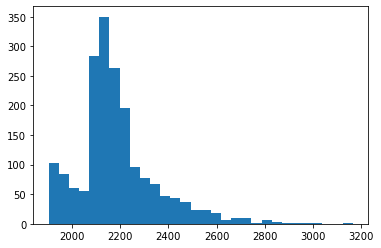

In [52]:
plt.hist(caly_df["IE"],bins=30)

In [53]:
caly_df["IE"].describe()

count    1875.000000
mean     2186.410133
std       166.883876
min      1903.000000
25%      2096.000000
50%      2156.000000
75%      2243.000000
max      3165.000000
Name: IE, dtype: float64

In [54]:
caly_df.loc[(caly_df["IE"]<=2096), "Klasa"] = "Małe"
caly_df.loc[(2096<caly_df["IE"]) & (caly_df["IE"]<=2156), "Klasa"] = "Średnie"
caly_df.loc[(2156<caly_df["IE"]) & (caly_df["IE"]<=2243), "Klasa"] = "Wysokie"
caly_df.loc[caly_df["IE"]>2243, "Klasa"] = "Ekstrimum"

(array([475.,   0.,   0., 470.,   0.,   0., 466.,   0.,   0., 464.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

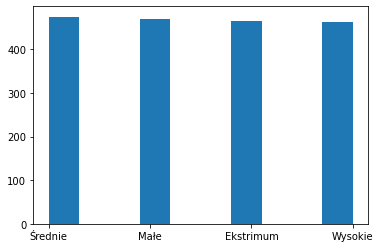

In [55]:
plt.hist(caly_df["Klasa"])

In [56]:
caly_df["Klasa"].value_counts()

Średnie      475
Małe         470
Ekstrimum    466
Wysokie      464
Name: Klasa, dtype: int64

In [57]:
list(caly_df)

['IE',
 'PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 'Klasa']

In [58]:
train_df, test_df = train_test_split(caly_df, test_size=0.2, random_state=42,stratify=caly_df['Klasa'])
#test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Klasa'])

del train_df['Klasa']
del test_df['Klasa']
#del val_df['Klasa']


train_label=train_df['IE']
test_label=test_df['IE']
#val_label=val_df['IE']

del train_df['IE']
del test_df['IE']
#del val_df['IE']


In [59]:
list(train_df)

['PI-PROD',
 'PI-POKR',
 'Prc',
 'Psm',
 'Pnr',
 'Pw',
 'PI-PLOD',
 'CRj',
 'CRk',
 'PP',
 'OMC',
 'WH-KSOM',
 'WH-DLUG',
 'IP',
 'kg ml',
 'kg tł',
 '% tł',
 'kg bi',
 '% bi',
 'rc',
 'sm',
 'nr',
 'w',
 'og',
 'DOLNOŚLĄSKIE',
 'KUJAWSKO-POMORSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'MAZOWIECKIE',
 'MAŁOPOLSKIE',
 'OPOLSKIE',
 'PODKARPACKIE',
 'PODLASKIE',
 'POMORSKIE',
 'WARMIŃSKO-MAZURSKIE',
 'WIELKOPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŁÓDZKIE',
 'ŚLĄSKIE',
 'ŚWIĘTOKRZYSKIE',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [60]:
len(list(train_df))

47

## 1.2 Standaryzacja

In [61]:
train_df.iloc[:,:24]

,PI-PROD,PI-POKR,Prc,Psm,Pnr,Pw,PI-PLOD,CRj,CRk,PP,...,kg ml,kg tł,% tł,kg bi,% bi,rc,sm,nr,w,og
974,130,111,126,117,100,108,118,116,120,98,...,980,380,-2,417,12,113.0,110.0,103.0,108.0,117.0
84,135,109,116,108,104,106,120,119,117,96,...,1263,521,0,446,4,108.0,105.0,110.0,108.0,108.0
753,137,121,121,116,120,110,101,101,100,101,...,1237,666,18,419,2,118.0,115.0,126.0,108.0,121.0
643,117,125,101,103,114,127,123,115,130,114,...,723,305,1,227,-1,102.0,101.0,124.0,127.0,117.0
1438,133,109,104,113,102,108,112,111,116,98,...,1254,485,-3,425,2,108.0,108.0,116.0,111.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,125,118,117,112,100,119,110,108,113,102,...,845,467,14,307,4,110.0,108.0,101.0,118.0,118.0
650,143,129,116,115,115,126,117,115,119,100,...,1448,694,11,509,4,113.0,109.0,122.0,126.0,125.0
732,135,121,107,115,105,123,105,104,104,104,...,1113,561,12,437,9,107.0,109.0,109.0,119.0,123.0
1226,128,124,104,108,110,127,106,103,109,109,...,1111,407,-5,380,2,105.0,103.0,118.0,128.0,120.0


In [62]:
scaler = StandardScaler()
train_df.iloc[:,:24]=scaler.fit_transform(train_df.iloc[:,:24])
test_df.iloc[:,:24]=scaler.fit_transform(test_df.iloc[:,:24])
#val_df.iloc[:,14:]=scaler.fit_transform(val_df.iloc[:,14:])

In [63]:
train_df.iloc[:,20:29]

,sm,nr,w,og,DOLNOŚLĄSKIE,KUJAWSKO-POMORSKIE,LUBELSKIE,LUBUSKIE,MAZOWIECKIE
974,0.891719,-1.253508,-1.582152,0.297493,0,0,0,0,0
84,-0.188542,-0.294750,-1.582152,-1.048403,0,0,0,0,0
753,1.971980,1.896698,-1.582152,0.895669,0,0,0,0,0
643,-1.052750,1.622767,1.088977,0.297493,0,0,0,0,0
1438,0.459615,0.527043,-1.160395,-0.450227,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
143,0.459615,-1.527439,-0.176295,0.447037,0,0,0,0,0
650,0.675667,1.348836,0.948391,1.493845,0,0,0,0,0
732,0.675667,-0.431715,-0.035709,1.194757,0,0,0,0,0
1226,-0.620646,0.800974,1.229563,0.746125,0,0,0,0,0


In [64]:
train_df.shape

(1500, 47)

In [65]:
test_df.shape

(375, 47)

In [66]:
train_df = np.array(train_df)
test_df = np.array(test_df)

In [67]:
train_df

array([[ 0.45476225, -0.93083361,  2.37267516, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.23222221, -1.21598635,  1.10580699, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.5432062 ,  0.49493011,  1.73924108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.23222221,  0.49493011, -0.03437436, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.14377826,  0.92265923, -0.41443481, ...,  0.        ,
         1.        ,  0.        ],
       [-0.94466569, -0.36052812,  1.23249381, ...,  1.        ,
         0.        ,  0.        ]])

In [68]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [69]:
train_label

array([2085, 2142, 2037, ..., 2128, 2096, 2058], dtype=int64)

In [70]:
METRICS=['mae']

# 2 Moduł TALOS

Zamiast dobierać wszystkie hiperparametry na nowo, sprawdzę czy siec preferuje inne w waskim zakresie

## 2.1 Słownik parametrów do wypróbowania

In [71]:
p = {'first_neuron':[250], #best 250
     'hidden_neuron':[25],# best 25
     'hidden_layers':[2],  #best 2
     'batch_size': [128], # best 128
     'optimizer': ['adadelta','nadam'],# best adadelta 
     'kernel_initializer': ['orthogonal'], #best orthogonogal
     'epochs': [1000000], # never touch it
     'dropout': [0],  # po dopasowaniu znowu nie bedzie potrzebne
     'activation_layer':['relu'],
     'batc_normalization':[False], # do zrobienia potem
     'last_activation': ['linear']} #never touch it
#     
#    

## 2.2 Tworzę funkcję do tworzenia instancji modelu keras

In [72]:
def numerai_model(x_train, y_train, x_val, y_val, params):
    print(params)

    model = Sequential()
    
    ## initial layer
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer = params['kernel_initializer'] ))
    if params['batc_normalization']==True:
        model.add(BatchNormalization())
    model.add(Dropout(params['dropout']))
    
    ## hidden layers
    for i in range(params['hidden_layers']):
        print (f"adding layer {i+1}")
        model.add(Dense(params['hidden_neuron'], activation='relu',
                    kernel_initializer=params['kernel_initializer']))
        if params['batc_normalization']==True:
            model.add(BatchNormalization())
        model.add(Dropout(params['dropout']))
    
    
    ## final layer
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss='mean_absolute_error', 
                  optimizer=params['optimizer'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        callbacks = [early_stopper(params['epochs'], patience=10,monitor='val_loss')] #,ta.live(),
                        )

    return history, model

## 2.3 Przeprowadzam skan, używając parametrów i funkcji wyżej


In [ ]:
t = ta.Scan(x=train_df, y=train_label,
            x_val=test_df, y_val=test_label,
            model=numerai_model,
            params=p,
            experiment_name='Predykcja IE')

# 3. Wczytuje wyniki

In [2]:
df = pd.read_csv('D:/STUDIA/ROK_II/Projekt/Indeks Ekonomiczny/Sieci neuro/Zestaw jalowka + krowa/Predykcja IE/051221010125.csv')

## 3.1 Wyliczam ilość neuronów i połączeń

In [75]:
df['nodes'] = df.first_neuron + df.hidden_neuron*df.hidden_layers
df['links'] =  df.nodes * (df.nodes-1) / 2
df['val_loss_improvement'] = df.loss - df.val_loss 
#compare to baseline log-loss (higher is better)
print(df.sort_values('val_loss').head())

   round_epochs      loss   val_loss activation_layer  batc_normalization  \
0        291059  2.392027  21.243888             relu               False   
1        117864  1.466849  22.681491             relu               False   

   batch_size  dropout   epochs  first_neuron  hidden_layers  hidden_neuron  \
0         128        0  1000000           250              2             25   
1         128        0  1000000           250              2             25   

  kernel_initializer last_activation optimizer  nodes    links  \
0         orthogonal          linear  adadelta    300  44850.0   
1         orthogonal          linear     nadam    300  44850.0   

   val_loss_improvement  
0            -18.851861  
1            -21.214643  


In [76]:
df.sort_values('val_loss')

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer,nodes,links,val_loss_improvement
0,291059,2.392027,21.243888,relu,False,128,0,1000000,250,2,25,orthogonal,linear,adadelta,300,44850.0,-18.851861
1,117864,1.466849,22.681491,relu,False,128,0,1000000,250,2,25,orthogonal,linear,nadam,300,44850.0,-21.214643


In [77]:
df.sort_values('loss')

,round_epochs,loss,val_loss,activation_layer,batc_normalization,batch_size,dropout,epochs,first_neuron,hidden_layers,hidden_neuron,kernel_initializer,last_activation,optimizer,nodes,links,val_loss_improvement
1,117864,1.466849,22.681491,relu,False,128,0,1000000,250,2,25,orthogonal,linear,nadam,300,44850.0,-21.214643
0,291059,2.392027,21.243888,relu,False,128,0,1000000,250,2,25,orthogonal,linear,adadelta,300,44850.0,-18.851861


## 3.2 Najlepszy wynik walidacji

In [78]:
min(df["val_loss"])

21.24388774617513

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([21.24388775, 21.38764812, 21.5314085 , 21.67516887, 21.81892924,
        21.96268962, 22.10644999, 22.25021037, 22.39397074, 22.53773112,
        22.68149149]),
 <BarContainer object of 10 artists>)

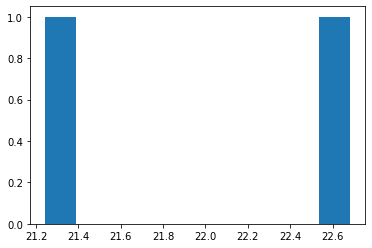

In [79]:
plt.hist(df["val_loss"])

## 3.3 Jednowymairowe zależności


### 3.3.6 Optimizer

Text(0.5, 1.0, 'Validation Loss as function of optimizer')

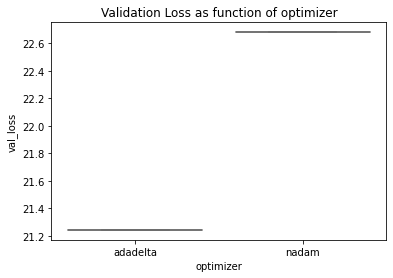

In [80]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_title(f'Validation Loss as function of {metric}')


In [ ]:
metric = 'optimizer'
ax = sns.boxplot(x=metric, y="val_loss", data=df.reset_index(),color='salmon')
ax.set_ylim([20, 34]) 
ax.set_title('Optimizer')
ax.set_ylabel('Absolute Error of validation')
ax.set_xlabel('Optimizer')
ax.set_title('EI Validation Loss as function of optimizer') #ta
